In [ ]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
import pyramid as pm
from sklearn import metrics
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [ ]:
flight = sns.load_dataset("flights")

In [ ]:
flight.head()
flight.tail()
flight.shape
flight.describe()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [ ]:
month = pd.date_range('19490131',periods=144,freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [ ]:
flight['datestamp'] = month
flight.head()
flight.describe()

,year,month,passengers,datestamp
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [ ]:
data = flight.loc[:,('datestamp','passengers')]
data.head()
data.describe()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
data.set_index('datestamp',inplace = True)
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'passengers in 1000')

Text(0.5, 1.0, 'Passengers over time')

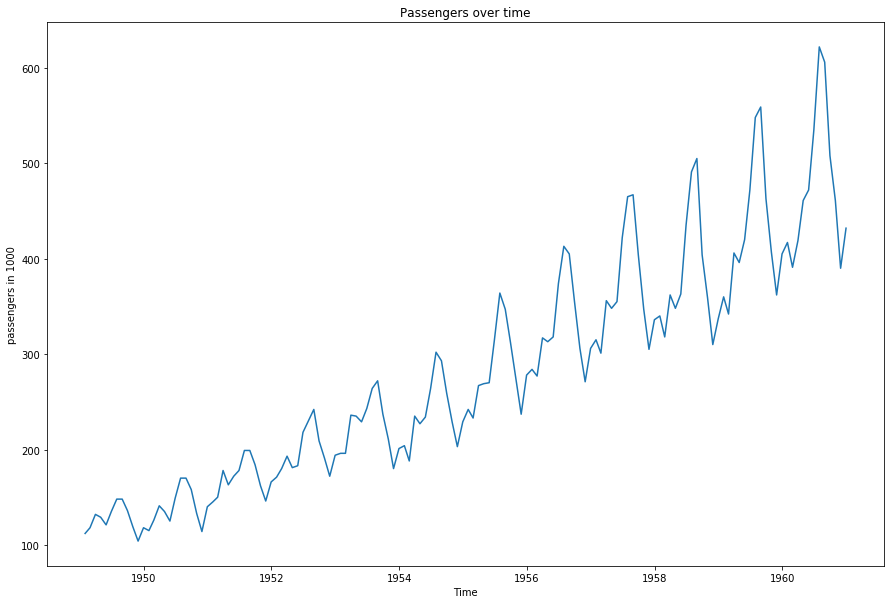

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('passengers in 1000')
plt.title('Passengers over time')
plt.show()

In [ ]:
train , test = data[:132],data[132:]
train.shape
test.shape

(132, 1)

(12, 1)

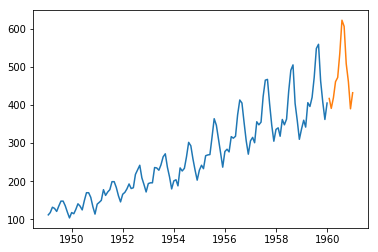

In [ ]:
plt.plot(train)
plt.plot(test)
plt.show();

In [ ]:
model = ExponentialSmoothing(train.passengers,trend='add',seasonal = 'mult',seasonal_periods=12).fit()

In [ ]:
model

In [ ]:
model.params

{'damping_slope': nan,
 'initial_level': 109.7631956629765,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 2.236627984027044,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 1.0,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

In [ ]:
predicted = model.predict(132,143)

In [ ]:
predicted

1960-01-31    407.236628
1960-02-29    409.473256
1960-03-31    411.709884
1960-04-30    413.946512
1960-05-31    416.183140
1960-06-30    418.419768
1960-07-31    420.656396
1960-08-31    422.893024
1960-09-30    425.129652
1960-10-31    427.366280
1960-11-30    429.602908
1960-12-31    431.839536
Freq: M, dtype: float64

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(train.datestamp,train.passengers,label = 'Train')
plt.plot(test.datestamp,test.passengers,label='test')
plt.plot(test.datestamp,predicted,label='Holt-Winters')
plt.legend(loc='best')
plt.show();

AttributeError: ignored

<Figure size 1080x720 with 0 Axes>